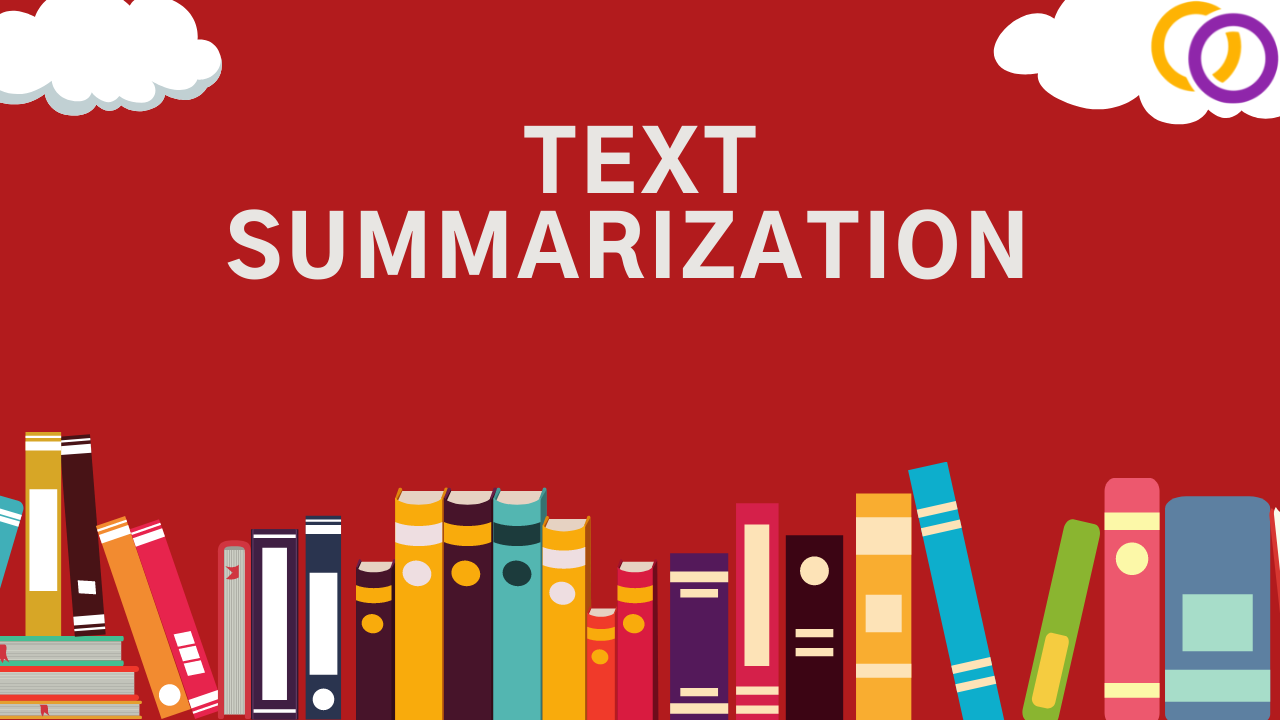

https://en.wikipedia.org/w/api.php

Text SUmmarization:

 - Abstractive Summarization
 - Extractive Summarization

In [1]:
# !pip install transformers

In [2]:
import requests
from transformers import AutoTokenizer

import nltk
nltk.download("stopwords")
nltk.download("punkt")
import re
import string

from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize as nltk_sent_tokenize
from nltk.tokenize import word_tokenize as nltk_word_tokenize

from sklearn.feature_extraction.text import CountVectorizer , TfidfTransformer
import numpy as np
from nltk.corpus import stopwords

from scipy.spatial.distance import cosine

[nltk_data] Downloading package stopwords to C:\Users\Prakash
[nltk_data]     Enerprener\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Prakash
[nltk_data]     Enerprener\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
def fetch_and_save_wiki(title):
  response = requests.get(
      "https://en.wikipedia.org/w/api.php",

      params = {
          "action":"query",
          "format" : "json",
          "titles": title,
          "prop" :"extracts",
          "explaintext": True
      }
      ).json()

  page = next(iter(response["query"]["pages"].values()))
  wiki_text = page["extract"]

  return wiki_text


In [35]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [5]:
def clean_text(text):
  text = re.sub(r'[^A-Za-z0-9\s.\(\)[\]{\}]+', '' , text)
  text = text.lower()
  text = " ".join(text.split())
  return text


def count_tokens(text):
  tokens = tokenizer.encode(text , add_special_tokens = True)
  return(len(tokens))

France Zinedine Zidane	3	—	—	3
Brazil Ronaldinho	2	—	—	2
Poland Robert Lewandowski	—	—	2	2
Germany Lothar Matthäus	1	—	—	1
Netherlands Marco van Basten	1	—	—	1
Italy Roberto Baggio	1	—	—	1
Brazil Romário	1	—	—	1
Liberia George Weah	1	—	—	1
Brazil Rivaldo	1	—	—	1
Portugal Luís Figo	1	—	—	1
Italy Fabio Cannavaro	1	—	—	1
Brazil Kaká	1	—	—	1
Croatia Luka Modrić

In [6]:
soccar_player =[
    "Lionel Messi",
    "Cristiano Ronaldo",
    "Ronaldo",
    "Zinedine Zidane",
    "Ronaldinho",
    "Robert Lewandowski",
    "Lothar Matthäus",
    "Marco van Basten",
    "Roberto Baggio",
    "Romário",
    "George Weah",
    "Rivaldo",
    "Luís Figo",
    "Fabio Cannavaro",
    "Kaká",
    "Luka Modrić"
]

data = []

for player in soccar_player:
  info = fetch_and_save_wiki(player)
  tokens = tokenizer.encode(info , add_special_tokens = True , truncation = True , max_length = 30000)
  num_tokens = len(tokens)
  data.append([player , info , num_tokens])

In [7]:
# data

In [8]:
import pandas as pd


In [9]:
df = pd.DataFrame(data , columns = ["soccar_player" , "player_information" , "num_tokens"])
df.head()

,soccar_player,player_information,num_tokens
0,Lionel Messi,"Lionel Andrés ""Leo"" Messi (Spanish pronunciati...",8504
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro (Portugue...,23286
2,Ronaldo,Ronaldo is a Portuguese given name equivalent ...,567
3,Zinedine Zidane,Zinedine Yazid Zidane (French: Zinédine Yazid ...,12680
4,Ronaldinho,"Ronaldo de Assis Moreira (born 21 March 1980),...",11846


In [10]:
df["player_information_cleaned"] = df['player_information'].apply(clean_text)

In [11]:
df["cleaned_token_player"] = df["player_information_cleaned"].apply(count_tokens)

Token indices sequence length is longer than the specified maximum sequence length for this model (7482 > 512). Running this sequence through the model will result in indexing errors


In [12]:
df.head()

,soccar_player,player_information,num_tokens,player_information_cleaned,cleaned_token_player
0,Lionel Messi,"Lionel Andrés ""Leo"" Messi (Spanish pronunciati...",8504,lionel andrs leo messi (spanish pronunciation ...,7482
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro (Portugue...,23286,cristiano ronaldo dos santos aveiro (portugues...,20569
2,Ronaldo,Ronaldo is a Portuguese given name equivalent ...,567,ronaldo is a portuguese given name equivalent ...,498
3,Zinedine Zidane,Zinedine Yazid Zidane (French: Zinédine Yazid ...,12680,zinedine yazid zidane (french zindine yazid zi...,11234
4,Ronaldinho,"Ronaldo de Assis Moreira (born 21 March 1980),...",11846,ronaldo de assis moreira (born 21 march 1980) ...,10553


In [13]:
# df.to_csv("world_soccar_player.csv")

In [14]:
# Sentence tokenization

def sent_tokenize(text):
  sents = nltk_sent_tokenize(text)

  sent_filtered = []

  for s in sents:
    sent_filtered.append(s)
  return sent_filtered


# Clean sentence function

def cleanup_sentences(text):
  stop_words = set(stopwords.words("english"))
  sentences = sent_tokenize(text)

  sentences_cleaned = []

  for sent in sentences:
    words = nltk_word_tokenize(sent)
    words = [w for w in words if w not in string.punctuation]
    words = [w for w in words if not w.lower() in stop_words]
    words = [w.lower() for w in words]
    sentences_cleaned.append(" ".join(words))

  return sentences_cleaned
    

In [15]:
df["cleaned_sentences"] = df["player_information_cleaned"].apply(cleanup_sentences)

In [16]:
df.head()

,soccar_player,player_information,num_tokens,player_information_cleaned,cleaned_token_player,cleaned_sentences
0,Lionel Messi,"Lionel Andrés ""Leo"" Messi (Spanish pronunciati...",8504,lionel andrs leo messi (spanish pronunciation ...,7482,[lionel andrs leo messi spanish pronunciation ...
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro (Portugue...,23286,cristiano ronaldo dos santos aveiro (portugues...,20569,[cristiano ronaldo dos santos aveiro portugues...
2,Ronaldo,Ronaldo is a Portuguese given name equivalent ...,567,ronaldo is a portuguese given name equivalent ...,498,[ronaldo portuguese given name equivalent engl...
3,Zinedine Zidane,Zinedine Yazid Zidane (French: Zinédine Yazid ...,12680,zinedine yazid zidane (french zindine yazid zi...,11234,[zinedine yazid zidane french zindine yazid zi...
4,Ronaldinho,"Ronaldo de Assis Moreira (born 21 March 1980),...",11846,ronaldo de assis moreira (born 21 march 1980) ...,10553,[ronaldo de assis moreira born 21 march 1980 c...


In [17]:
# df["cleaned_sentences"][0]

In [18]:
# TFIDF:

def get_tf_idf(sentences):
    vectorizer = CountVectorizer()
    sent_word_matrix = vectorizer.fit_transform(sentences)

    transformer = TfidfTransformer(norm = None , sublinear_tf= False , smooth_idf = False)
    tfidf = transformer.fit_transform(sent_word_matrix)
    tfidf = tfidf.toarray()

    # Calculate the centroid vector
    centroid_vector = tfidf.sum(axis = 0)
    centroid_vector = np.divide(centroid_vector , centroid_vector.max())

    feature_names = vectorizer.get_feature_names_out()

    relevant_vector_indices = np.where(centroid_vector > 0.3)[0]

    word_list = [feature_names[idx] for idx in relevant_vector_indices]

    return word_list


In [19]:
df["most_important_words"] = df["cleaned_sentences"].apply(get_tf_idf)

In [20]:
df.head()

,soccar_player,player_information,num_tokens,player_information_cleaned,cleaned_token_player,cleaned_sentences,most_important_words
0,Lionel Messi,"Lionel Andrés ""Leo"" Messi (Spanish pronunciati...",8504,lionel andrs leo messi (spanish pronunciation ...,7482,[lionel andrs leo messi spanish pronunciation ...,"[2011, 2021, 2022, 2023, ball, barcelona, best..."
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro (Portugue...,23286,cristiano ronaldo dos santos aveiro (portugues...,20569,[cristiano ronaldo dos santos aveiro portugues...,"[career, champions, club, cup, first, goal, go..."
2,Ronaldo,Ronaldo is a Portuguese given name equivalent ...,567,ronaldo is a portuguese given name equivalent ...,498,[ronaldo portuguese given name equivalent engl...,"[born, brazilian, footballer, ronaldo]"
3,Zinedine Zidane,Zinedine Yazid Zidane (French: Zinédine Yazid ...,12680,zinedine yazid zidane (french zindine yazid zi...,11234,[zinedine yazid zidane french zindine yazid zi...,"[1998, 2017, also, best, champions, club, coac..."
4,Ronaldinho,"Ronaldo de Assis Moreira (born 21 March 1980),...",11846,ronaldo de assis moreira (born 21 march 1980) ...,10553,[ronaldo de assis moreira born 21 march 1980 c...,"[2005, ball, barcelona, brazil, career, club, ..."


In [21]:
# df['most_important_words'][1]

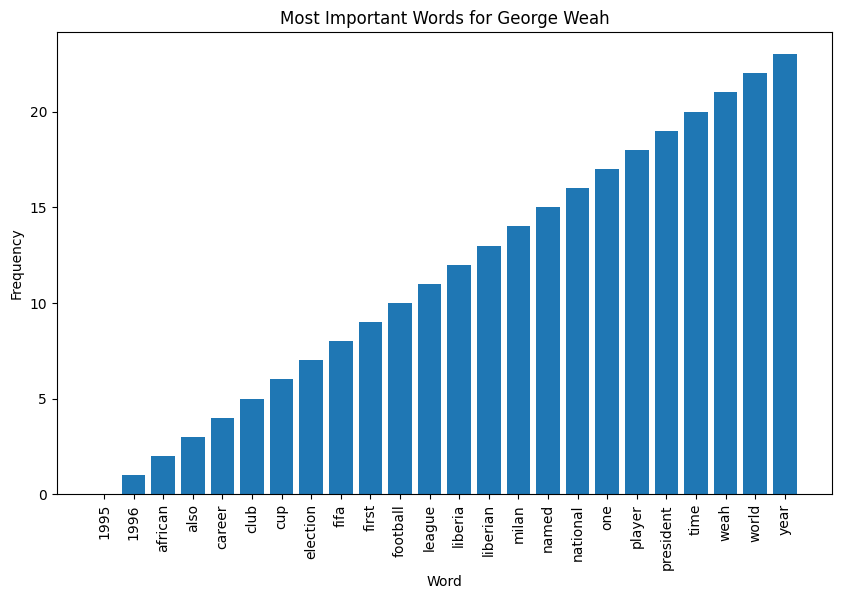

In [22]:
import matplotlib.pyplot as plt

def plot_important_words(df, player_index):
  important_words = df['most_important_words'][player_index]
  plt.figure(figsize=(10, 6))
  plt.bar(important_words, range(len(important_words)))
  plt.xticks(rotation='vertical')
  plt.xlabel('Word')
  plt.ylabel('Frequency')
  plt.title(f"Most Important Words for {df['soccar_player'][player_index]}")
  plt.show()

# Plot the most important words for the first player
plot_important_words(df, 10)


In [36]:
def word_vector_cache(sentences , embedding_model):
  word_vectors = dict()
  for sent in sentences:
    words = nltk_word_tokenize(sent)
    for w in words:
      word_vectors.update({w: embedding_model.wv[w]})
    return word_vectors

In [37]:
    def build_embedding_representation(words , word_vectors , embedding_model):
      embedding_representation = np.zeros(embedding_model.vector_size , dtype = 'float32')
      word_vector_key = set(word_vectors.keys())

      count = 0
      for w in words:
        if w in word_vector_key:
          embedding_representation = embedding_representation + word_vectors[w]
          count += 1

      if count !=0:
        embedding_representation = np.divide(embedding_representation , count)

      return embedding_representation


In [38]:
def similarity(v1 , v2):
  score = 0.0
  if np.count_nonzero(v1) != 0 and np.count_nonzero(v2) != 0:
    score = ((1 - cosine(v1,v2)) + 1) / 2
  return score

In [39]:

def summarize(text , embedding_model):
  raw_sentences = sent_tokenize(text)
  clean_sentences = cleanup_sentences(text)

  for i , s in enumerate(raw_sentences):
    print(i , s)

  for i , s in enumerate(clean_sentences):
    print(i ,s)


  centroid_words = get_tf_idf(clean_sentences)
  print(len(centroid_words) , centroid_words)

  word_vectors = word_vector_cache(clean_sentences , embedding_model)

  # Centroid embedding representation

  centroid_vectors = build_embedding_representation(centroid_words , word_vectors ,embedding_model)
  sentences_score = []

  for i in range(len(clean_sentences)):
    score = []
    words = clean_sentences[i].split()

    #sentence embedding representation
    sentence_vector = build_embedding_representation(words ,word_vectors , embedding_model )

    # Cosine similarity between sentence vector and centroid vector

    score = similarity(sentence_vector , centroid_vectors)
    sentences_score.append((i , raw_sentences[i] , score , sentence_vector))

    sentences_score_sort = sorted(sentences_score , key = lambda el: el[2] , reverse = True)

    for s in sentences_score_sort:
      print(s[0] , s[1] , s[2])

    count = 0
    sentence_summary = []

    for s in sentences_score_sort:
      if count > 100:
        break
      include_flag = True

      for ps in sentence_summary:
        sim = similarity(s[3] , ps[3])
        if sim > 0.95:
          include_flag = False

      if include_flag:
        sentence_summary.append(s)
        count += len(s[1].split())


      sentence_summary = sorted(sentence_summary , key = lambda el: el[0] , reverse = False)

    summary = "\n".join(s[1] for s in sentence_summary)
    print(summary)

    return summary

In [27]:
df['cleaned_sentences'] = df['cleaned_sentences'].astype(str)

In [28]:
sentences = [nltk.word_tokenize(sent) for sent in df['cleaned_# sentences = [nltk.word_tokenize(sent) for sent in df['cleaned_sentences'].values]

model = Word2Vec(sentences , min_count = 1 , sg = 1)

df["summary"] = df["cleaned_sentences"].apply(lambda x:summarize(x , model))sentences'].values]

In [69]:
# sentences = [nltk.word_tokenize(sent) for sent in df['cleaned_sentences'].values]

model = Word2Vec(sentences , min_count = 1 , sg = 1)

df["summary"] = df["cleaned_sentences"].apply(lambda x:summarize(x , model))

0 ['lionel andrs leo messi spanish pronunciation ljonel andes mesi born 24 june 1987 argentine professional footballer plays forward captains major league soccer club inter miami argentina national team', 'widely regarded one greatest players time messi record eight ballon dor awards record six european golden shoes named worlds best player record eight times fifa', 'leaving club 2021 spent entire professional career barcelona clubrecord 34 trophies including ten la liga titles seven copa del rey titles uefa champions league four times', 'country 2021 copa amrica 2022 fifa world cup', 'prolific goalscorer creative playmaker messi holds records goals la liga 474 hattricks la liga 36 uefa champions league eight assists la liga 192 copa amrica 17', 'also international goals south american male 106', 'messi scored 800 senior career goals club country goals player single club 672', 'messi relocated spain argentina aged 13 join barcelona made competitive debut aged 17 october 2004. establish

In [30]:
df.head()

,soccar_player,player_information,num_tokens,player_information_cleaned,cleaned_token_player,cleaned_sentences,most_important_words,summary
0,Lionel Messi,"Lionel Andrés ""Leo"" Messi (Spanish pronunciati...",8504,lionel andrs leo messi (spanish pronunciation ...,7482,['lionel andrs leo messi spanish pronunciation...,"[2011, 2021, 2022, 2023, ball, barcelona, best...",['lionel andrs leo messi spanish pronunciation...
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro (Portugue...,23286,cristiano ronaldo dos santos aveiro (portugues...,20569,['cristiano ronaldo dos santos aveiro portugue...,"[career, champions, club, cup, first, goal, go...",['cristiano ronaldo dos santos aveiro portugue...
2,Ronaldo,Ronaldo is a Portuguese given name equivalent ...,567,ronaldo is a portuguese given name equivalent ...,498,['ronaldo portuguese given name equivalent eng...,"[born, brazilian, footballer, ronaldo]",['ronaldo portuguese given name equivalent eng...
3,Zinedine Zidane,Zinedine Yazid Zidane (French: Zinédine Yazid ...,12680,zinedine yazid zidane (french zindine yazid zi...,11234,['zinedine yazid zidane french zindine yazid z...,"[1998, 2017, also, best, champions, club, coac...",['zinedine yazid zidane french zindine yazid z...
4,Ronaldinho,"Ronaldo de Assis Moreira (born 21 March 1980),...",11846,ronaldo de assis moreira (born 21 march 1980) ...,10553,['ronaldo de assis moreira born 21 march 1980 ...,"[2005, ball, barcelona, brazil, career, club, ...",['ronaldo de assis moreira born 21 march 1980 ...


In [31]:
df["summary_token"] = df["summary"].apply(count_tokens)

In [32]:
df.head()

,soccar_player,player_information,num_tokens,player_information_cleaned,cleaned_token_player,cleaned_sentences,most_important_words,summary,summary_token
0,Lionel Messi,"Lionel Andrés ""Leo"" Messi (Spanish pronunciati...",8504,lionel andrs leo messi (spanish pronunciation ...,7482,['lionel andrs leo messi spanish pronunciation...,"[2011, 2021, 2022, 2023, ball, barcelona, best...",['lionel andrs leo messi spanish pronunciation...,642
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro (Portugue...,23286,cristiano ronaldo dos santos aveiro (portugues...,20569,['cristiano ronaldo dos santos aveiro portugue...,"[career, champions, club, cup, first, goal, go...",['cristiano ronaldo dos santos aveiro portugue...,379
2,Ronaldo,Ronaldo is a Portuguese given name equivalent ...,567,ronaldo is a portuguese given name equivalent ...,498,['ronaldo portuguese given name equivalent eng...,"[born, brazilian, footballer, ronaldo]",['ronaldo portuguese given name equivalent eng...,417
3,Zinedine Zidane,Zinedine Yazid Zidane (French: Zinédine Yazid ...,12680,zinedine yazid zidane (french zindine yazid zi...,11234,['zinedine yazid zidane french zindine yazid z...,"[1998, 2017, also, best, champions, club, coac...",['zinedine yazid zidane french zindine yazid z...,4832
4,Ronaldinho,"Ronaldo de Assis Moreira (born 21 March 1980),...",11846,ronaldo de assis moreira (born 21 march 1980) ...,10553,['ronaldo de assis moreira born 21 march 1980 ...,"[2005, ball, barcelona, brazil, career, club, ...",['ronaldo de assis moreira born 21 march 1980 ...,2534


In [57]:
from wordcloud import WordCloud

In [59]:
im_words=(' ').join(df["summary"])

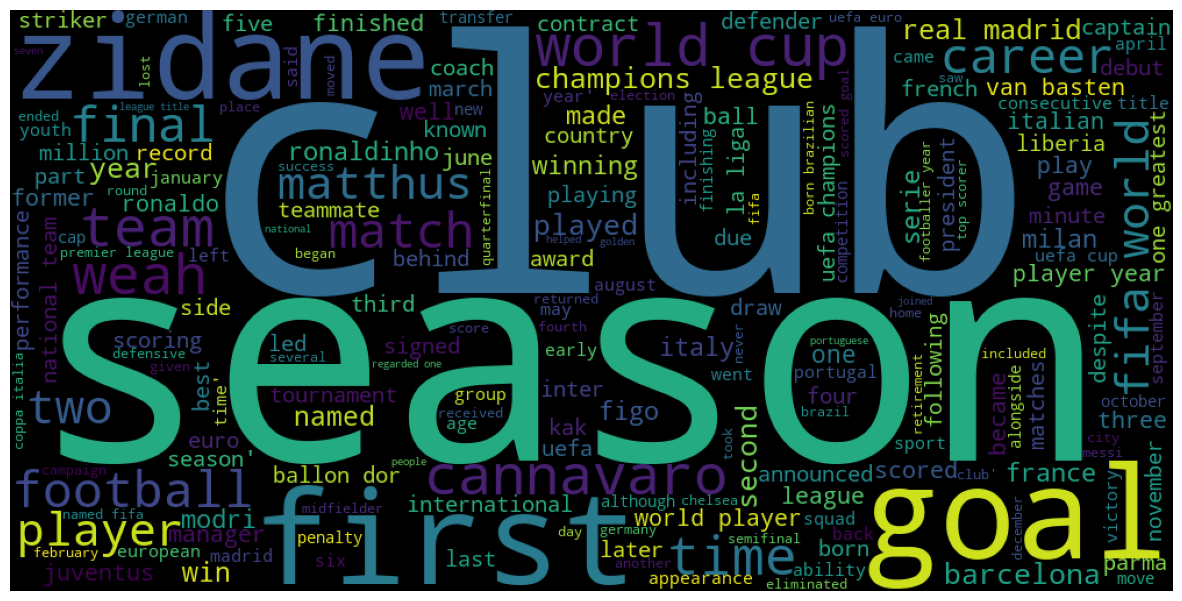

In [62]:
worcloud=WordCloud(width=1000,height=500).generate(im_words)
plt.figure(figsize=(15,8))
plt.imshow(worcloud)
plt.axis('off')
plt.show()